# Projected Outcomes Sensitivity Analysis

This notebook contains the code for the sensitivty analysis of the projection model used to project outcomes under the 10x5 and 50x1 districting plans using demographic threshold inference model (see section 5 of the report).

The sensitivity analysis proceeds by altering the probabilities of the samplers. There are a total of 54 different scenarios, each detailed below. 

In [14]:
import pandas
import numpy
from collections import namedtuple
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import itertools

## Projection model

In [15]:
class ElectionSampler:
    cases = None
    threshold = None
    
    def decide_case(self, groups: pandas.Series):
        number_over_threshold = (groups > self.threshold).sum()
        return self.cases[number_over_threshold]

    def sample(self, groups: pandas.Series):
        """
        :param pandas.Series groups: a single row of a DataFrame with the percentages
            of each racial group in a ward.
        """
        outcomes, probabilities = self.decide_case(groups)
        outcome = numpy.random.choice(a=outcomes, p=probabilities)
        groups_from_highest_to_lowest = groups.sort_values(ascending=False).keys()
        full_outcome = itertools.chain(
            outcome,
            itertools.repeat(0, len(groups_from_highest_to_lowest) - len(outcome))
        )
        return pandas.Series(full_outcome, index=groups_from_highest_to_lowest)

class ElectionSamplerWithMajority(ElectionSampler):
    def decide_case(self, groups: pandas.Series):
        number_over_threshold = (groups > self.threshold).sum()
        any_majority = (groups > 0.5).any()
        if any_majority and number_over_threshold in self.cases["majority"]:
            return self.cases["majority"][number_over_threshold]
        else:
            return self.cases["plurality"][number_over_threshold]


In [16]:
Case = namedtuple("Case", ["outcomes", "probabilities"])

## Sampling classes
Each of the sampling classes below has been altered for the sensitivity analysis, with the first in each type being the control (the sampler used for the paper).

In [17]:
# Control
class TenByFiveSampler_1(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "No change."

# Case 1 changes    
class TenByFiveSampler_2(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.6, 0.4)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 1 change: probabilities=(0.6, 0.4)"

class TenByFiveSampler_3(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.7, 0.3)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 1 change: probabilities=(0.7, 0.3)"

class TenByFiveSampler_4(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.4, 0.6)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 1 change: probabilities=(0.4, 0.6)"

class TenByFiveSampler_5(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.3, 0.7)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 1 change: probabilities=(0.3, 0.7)"
    
# Case 2 changes
class TenByFiveSampler_6(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.30, 0.60, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 2 change: probabilities = (0.30, 0.60, 0.1, 0.05, 0.05)"

class TenByFiveSampler_7(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.60, 0.05, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 2 change: probabilities = (0.25, 0.60, 0.05, 0.05, 0.05)"
    
class TenByFiveSampler_8(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.30, 0.55, 0.05, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 2 change: probabilities = (0.30, 0.55, 0.05, 0.05, 0.05)"

# Case 3 changes
class TenByFiveSampler_9(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.05, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.30, 0.25, 0.1, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 3 change: probabilities = (0.30, 0.25, 0.1, 0.2, 0.15)"

class TenByFiveSampler_10(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.05, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.35, 0.30, 0.1, 0.1, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 3 change: probabilities = (0.35, 0.30, 0.1, 0.1, 0.15)"
    
class TenByFiveSampler_11(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.05, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.30, 0.25, 0.15, 0.15, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.2, 0.2, 0.2, 0.2, 0.2))
    }
    threshold = 1/6
    change = "Case 3 change: probabilities = (0.30, 0.25, 0.15, 0.15, 0.15)"

# Case 4 changes
class TenByFiveSampler_12(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.2, 0.15, 0.15))
    }
    threshold = 1/6
    change = "Case 4 change: probabilities = (0.25, 0.25, 0.2, 0.15, 0.15)"
    
class TenByFiveSampler_13(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.30, 0.25, 0.15, 0.15, 0.15))
    }
    threshold = 1/6
    change = "Case 4 change: probabilities = (0.30, 0.25, 0.15, 0.15, 0.15)"
    
class TenByFiveSampler_14(ElectionSampler):
    cases = {
        1: Case(outcomes=((5,), (4,1)), probabilities=(0.5, 0.5)),
        2: Case(((4, 1), (3, 2), (2, 3), (2, 2, 1), (3, 1, 1)), (0.25, 0.55, 0.1, 0.05, 0.05)),
        3: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.25, 0.25, 0.15, 0.2, 0.15)),
        4: Case(((3, 1, 1), (3, 2), (2, 3), (2, 2, 1), (2, 1, 2)), (0.3, 0.2, 0.2, 0.2, 0.1))
    }
    threshold = 1/6
    change = "Case 4 change: probabilities = (0.30, 0.25, 0.15, 0.15, 0.15)"

tenxfive = [TenByFiveSampler_1(),
            TenByFiveSampler_2(),
            TenByFiveSampler_3(),
            TenByFiveSampler_4(),
            TenByFiveSampler_5(),
            TenByFiveSampler_6(),
            TenByFiveSampler_7(),
            TenByFiveSampler_8(),
            TenByFiveSampler_9(),
            TenByFiveSampler_10(),
            TenByFiveSampler_11(),
            TenByFiveSampler_12(),
            TenByFiveSampler_13(),
            TenByFiveSampler_14()
           ]

In [18]:
# Control
class FiftyByOneSampler_1(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "No change."

# Majority case 1 changes
class FiftyByOneSampler_2(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.8, 0.2)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25    
    change = "Majority, case 1 change: probabilities = (0.8, 0.2)"

class FiftyByOneSampler_3(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.7, 0.3)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25    
    change = "Majority, case 1 change: probabilities = (0.7, 0.3)"
    
class FiftyByOneSampler_4(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25    
    change = "Majority, case 1 change: probabilities = (0.6, 0.4)"

# Majority case 2 changes
class FiftyByOneSampler_5(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.16, 0.04))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.8, 0.16, 0.04)"

class FiftyByOneSampler_6(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.14, 0.06))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.8, 0.14, 0.06)"

class FiftyByOneSampler_7(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.75, 0.2, 0.05))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.75, 0.2, 0.05)"

class FiftyByOneSampler_8(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.7, 0.2, 0.1))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.7, 0.2, 0.1)"

# Plurality case 1 changes
class FiftyByOneSampler_9(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(0.9, 0.1)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 1 change: probablities = (0.9, 0.1)"

class FiftyByOneSampler_10(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(0.8, 0.2)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 1 change: probablities = (0.8, 0.2)"

# Plurality case 2 changes
class FiftyByOneSampler_11(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.55, 0.45)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.55, 0.45)"
    
class FiftyByOneSampler_12(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.5, 0.5)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.5, 0.5)"

class FiftyByOneSampler_13(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.45, 0.55)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.45, 0.55)"

class FiftyByOneSampler_14(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.4, 0.6)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.4, 0.6)"
    
class FiftyByOneSampler_15(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.65, 0.35)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.65, 0.35)"
    
class FiftyByOneSampler_16(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.7, 0.3)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.7, 0.3)"
    
# Plurality case 3 changes
class FiftyByOneSampler_17(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.5, 0.3, 0.3))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.5, 0.3, 0.3)"
    
class FiftyByOneSampler_18(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.55, 0.3, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.55, 0.3, 0.25)"

class FiftyByOneSampler_19(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.4, 0.35, 0.25))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.4, 0.35, 0.25)"

class FiftyByOneSampler_20(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            2: Case(((1,), (0,1)), (0.9, 0.1)),
            3: Case(((1,), (0,1,), (0,0,1)), (0.8, 0.18, 0.02))
        },
        "plurality": {
            1: Case(outcomes=((1,), (0,1)), probabilities=(1, 0)),
            2: Case(((1,), (0,1)), (0.6, 0.4)),
            3: Case(((1,), (0,1), (0,0,1)),(0.45, 0.35, 0.2))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.45, 0.35, 0.2)"
    
fivexone = [FiftyByOneSampler_1(),
            FiftyByOneSampler_2(),
            FiftyByOneSampler_3(),
            FiftyByOneSampler_4(),
            FiftyByOneSampler_5(),
            FiftyByOneSampler_6(),
            FiftyByOneSampler_7(),
            FiftyByOneSampler_8(),
            FiftyByOneSampler_9(),
            FiftyByOneSampler_10(),
            FiftyByOneSampler_11(),
            FiftyByOneSampler_12(),
            FiftyByOneSampler_13(),
            FiftyByOneSampler_14(),
            FiftyByOneSampler_15(),
            FiftyByOneSampler_16(),
            FiftyByOneSampler_17(),
            FiftyByOneSampler_18(),
            FiftyByOneSampler_19(),
            FiftyByOneSampler_20()
           ]

In [19]:
# Control
class TenByThreeSampler_1(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "No change."

# Majority case 1 changes
class TenByThreeSampler_2(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.8, 0.2)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 1 change: probablities = (0.8, 0.2)"

class TenByThreeSampler_3(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.7, 0.3)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 1 change: probablities = (0.7, 0.3)"
    
class TenByThreeSampler_4(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.6, 0.4)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 1 change: probablities = (0.6, 0.4)"

class TenByThreeSampler_5(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.5, 0.5)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 1 change: probablities = (0.5, 0.5)"
    
# Majority case 2 changes
class TenByThreeSampler_6(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.3, 0.7)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.3, 0.7)"

class TenByThreeSampler_7(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.4, 0.6)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.4, 0.6)"
    
class TenByThreeSampler_8(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.5, 0.5)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 2 change: probablities = (0.5, 0.5)"

# Majority case 3 changes
class TenByThreeSampler_9(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.2, 0.4, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 3 change: probablities = (0.2, 0.4, 0.3, 0.1)"
    
class TenByThreeSampler_10(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.2, 0.5, 0.2, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 3 change: probablities = (0.2, 0.5, 0.2, 0.1)"

class TenByThreeSampler_11(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.4, 0.3, 0.2)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 3 change: probablities = (0.1, 0.4, 0.3, 0.2)"
    
class TenByThreeSampler_12(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.2, 0.4, 0.2, 0.2)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Majority, case 3 change: probablities = (0.2, 0.4, 0.2, 0.2)"
    
# Plurality case 1 changes
class TenByThreeSampler_13(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.6, 0.4)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Plurality, case 1 change: probablities = (0.6, 0.4)"
    
class TenByThreeSampler_14(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.4, 0.6)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Plurality, case 1 change: probablities = (0.4, 0.6)"
    
class TenByThreeSampler_15(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.15, 0.5, 0.25, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.15, 0.5, 0.25, 0.1)"
    
class TenByThreeSampler_16(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.2, 0.4, 0.2, 0.2)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.2, 0.4, 0.2, 0.2)"
    
class TenByThreeSampler_17(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.2, 0.2)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.1, 0.7))
        }
    }
    threshold = 0.25
    change = "Plurality, case 2 change: probablities = (0.1, 0.5, 0.2, 0.2)"

# Plurality case 3 changes
class TenByThreeSampler_18(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.15, 0.1, 0.65))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.1, 0.15, 0.1, 0.65)"

class TenByThreeSampler_19(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.2, 0.1, 0.65))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.05, 0.2, 0.1, 0.65)"
    
class TenByThreeSampler_20(ElectionSamplerWithMajority):
    cases = {
        "majority": {
            1: Case(outcomes=((3,), (2,1)), probabilities=(0.9, 0.1)),
            2: Case(((3,), (2,1)), (0.2, 0.8)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            
        },
        "plurality": {
            1: Case(((3,), (2,1)), (0.5, 0.5)),
            2: Case(((3,), (2,1), (1,2), (1,1,1)), (0.1, 0.5, 0.3, 0.1)),
            3: Case(((3,), (2,1), (1,2), (1,1,1)), (0.05, 0.15, 0.15, 0.65))
        }
    }
    threshold = 0.25
    change = "Plurality, case 3 change: probablities = (0.05, 0.15, 0.15, 0.65)"
    
tenxthree = [TenByThreeSampler_1(),
             TenByThreeSampler_2(),
             TenByThreeSampler_3(),
             TenByThreeSampler_4(),
             TenByThreeSampler_5(),
             TenByThreeSampler_6(),
             TenByThreeSampler_7(),
             TenByThreeSampler_8(),
             TenByThreeSampler_9(),
             TenByThreeSampler_10(),
             TenByThreeSampler_11(),
             TenByThreeSampler_12(),
             TenByThreeSampler_13(),
             TenByThreeSampler_14(),
             TenByThreeSampler_15(),
             TenByThreeSampler_16(),
             TenByThreeSampler_17(),
             TenByThreeSampler_18(),
             TenByThreeSampler_19(),
             TenByThreeSampler_20()
            ]

In [20]:
def load_data(filename):
    df = pandas.read_csv(filename)
    data = pandas.DataFrame(
        {
            "step": df["step"],
            "ward": df["ward"],
            "White": df["NH_WHITE"] / df["TOTPOP"],
            "Black": df["NH_BLACK"] / df["TOTPOP"],
            "Hispanic": df["HISP"] / df["TOTPOP"],
            "Asian": df["NH_ASIAN"] / df["TOTPOP"],
        }
    )
    return data

## Generating the projections

In [21]:
def random_sample(data, size, sampler):
    # Print the sample specification changes
    print(sampler.change)
    
    all_plans = {step: data.loc[indices] for step, indices in data.groupby("step").groups.items()}
    groups = ["White", "Black", "Hispanic", "Asian"]
    plan_indices = data["step"].unique()
    
    for plan_index in tqdm(numpy.random.choice(plan_indices, size=size)):
        wards = all_plans[plan_index]
        yield wards[groups].apply(sampler.sample, axis=1).sum()

In [22]:
groups = ["Asian", "Black", "Hispanic", "White"]

In [23]:
# Load in the data
prec50 = load_data("../ensembles/prec50/results.csv")
prec10 = load_data("../ensembles/prec10/results.csv")
ca10 = load_data("../ensembles/ca10/results.csv")

## Generate projections for every sample specification

In [24]:
num_samples = 100

FiftyByOne sensitivity analysis
No change.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.85it/s]


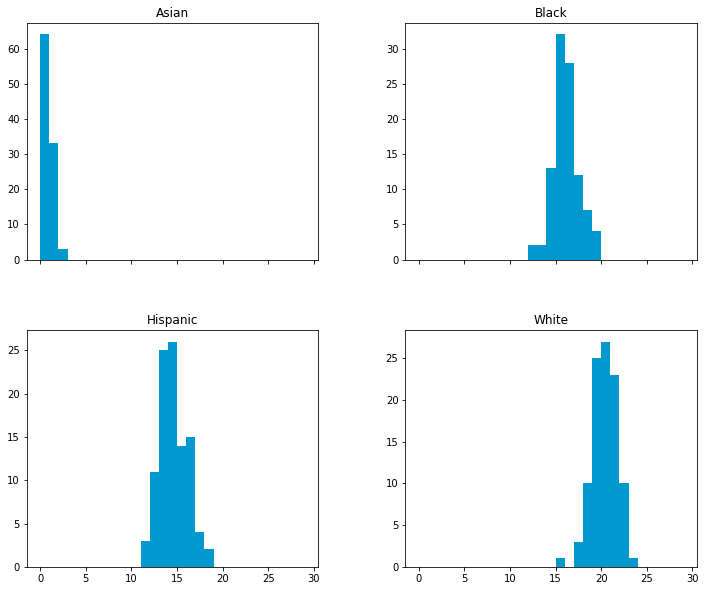

Asian        0.39
Black       15.66
Hispanic    14.08
White       19.87
dtype: float64
Majority, case 1 change: probabilities = (0.8, 0.2)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.67it/s]


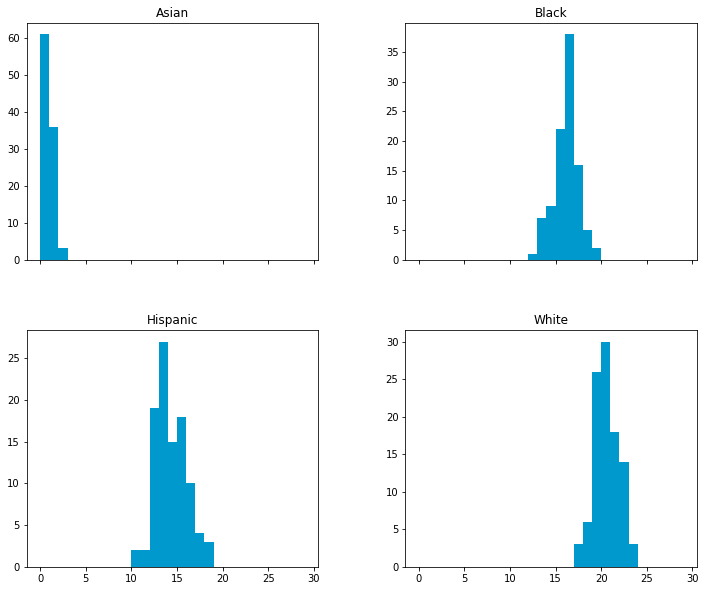

Asian        0.42
Black       15.67
Hispanic    13.83
White       20.08
dtype: float64
Majority, case 1 change: probabilities = (0.7, 0.3)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.79it/s]


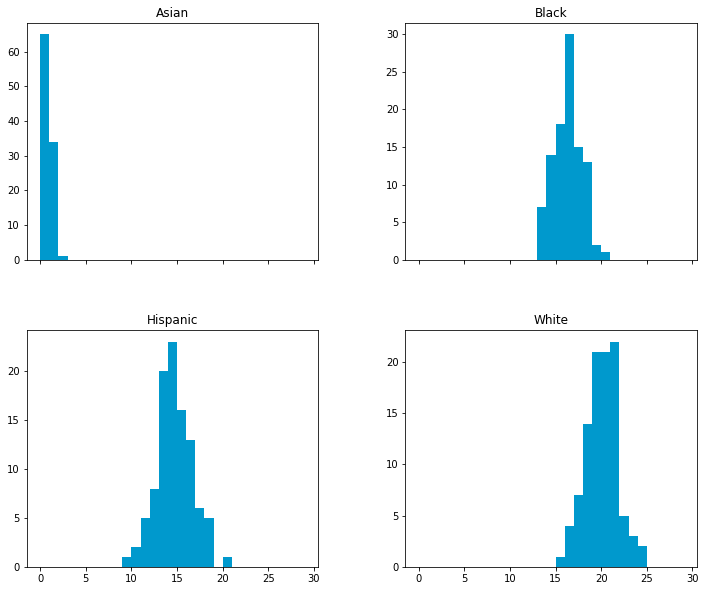

Asian        0.36
Black       15.84
Hispanic    14.22
White       19.58
dtype: float64
Majority, case 1 change: probabilities = (0.6, 0.4)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.60it/s]


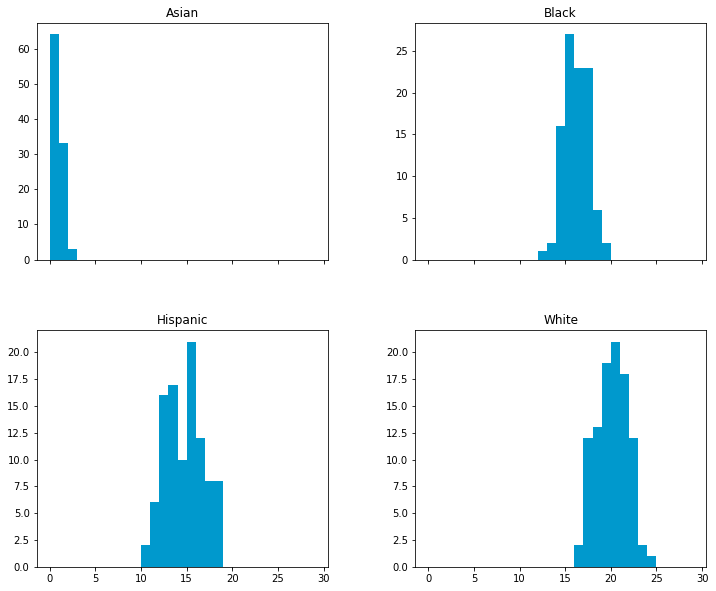

Asian        0.39
Black       15.72
Hispanic    14.26
White       19.63
dtype: float64
Majority, case 2 change: probablities = (0.8, 0.16, 0.04)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.03it/s]


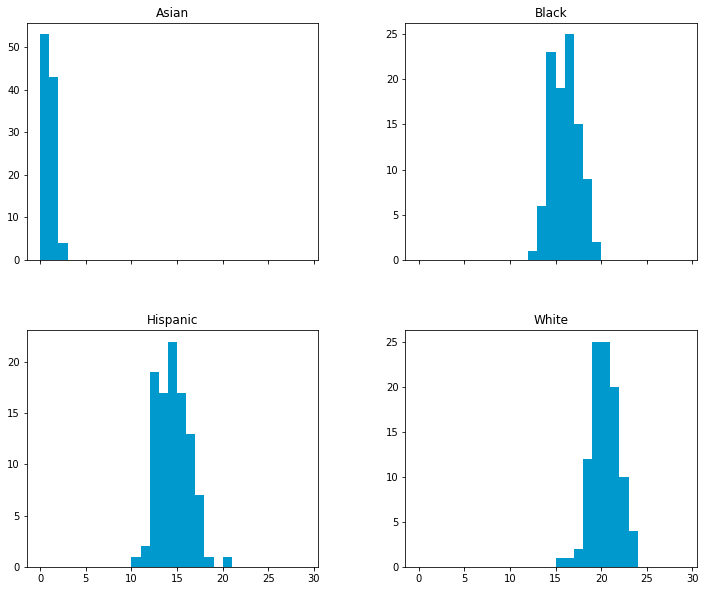

Asian        0.51
Black       15.52
Hispanic    14.09
White       19.88
dtype: float64
Majority, case 2 change: probablities = (0.8, 0.14, 0.06)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.46it/s]


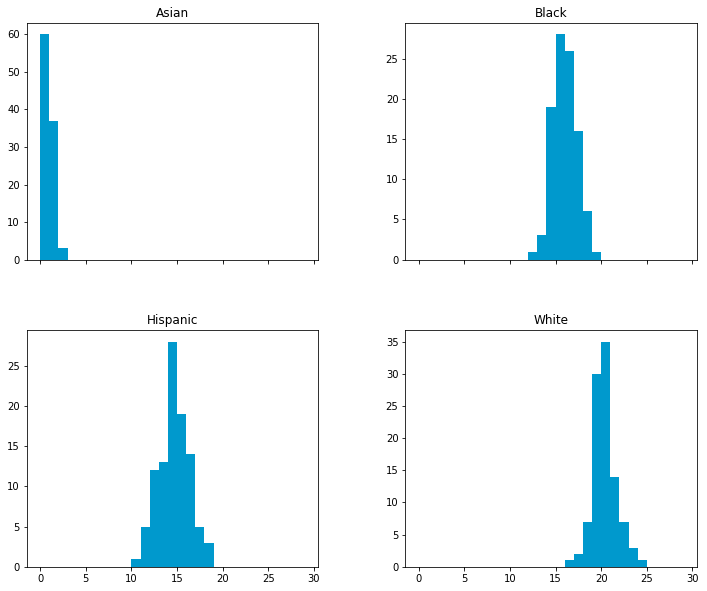

Asian        0.43
Black       15.52
Hispanic    14.18
White       19.87
dtype: float64
Majority, case 2 change: probablities = (0.75, 0.2, 0.05)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.34it/s]


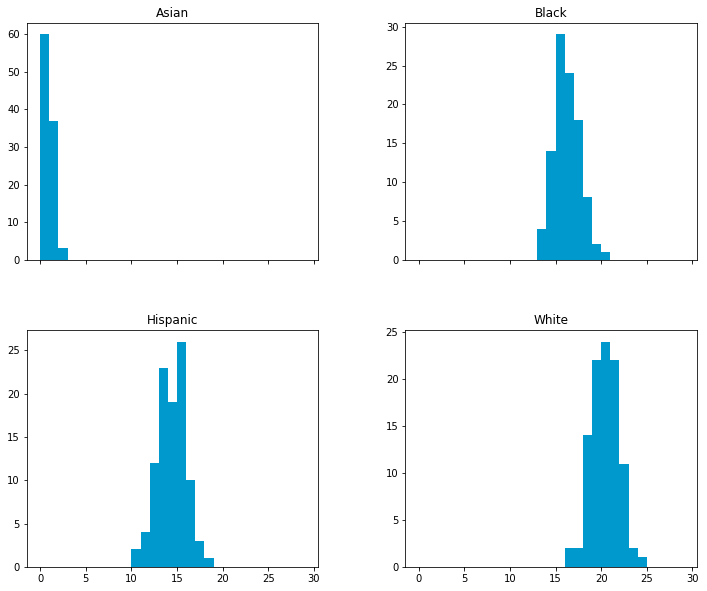

Asian        0.43
Black       15.75
Hispanic    13.92
White       19.90
dtype: float64
Majority, case 2 change: probablities = (0.7, 0.2, 0.1)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.84it/s]


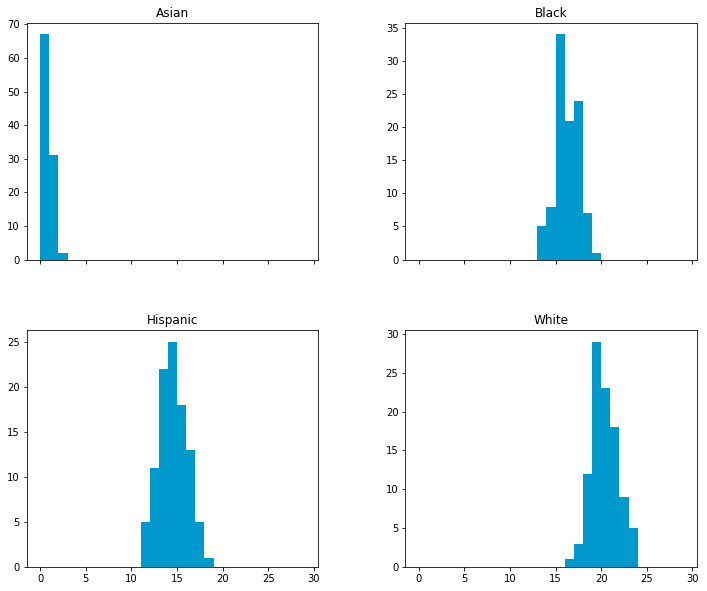

Asian        0.35
Black       15.76
Hispanic    14.04
White       19.85
dtype: float64
Plurality, case 1 change: probablities = (0.9, 0.1)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.73it/s]


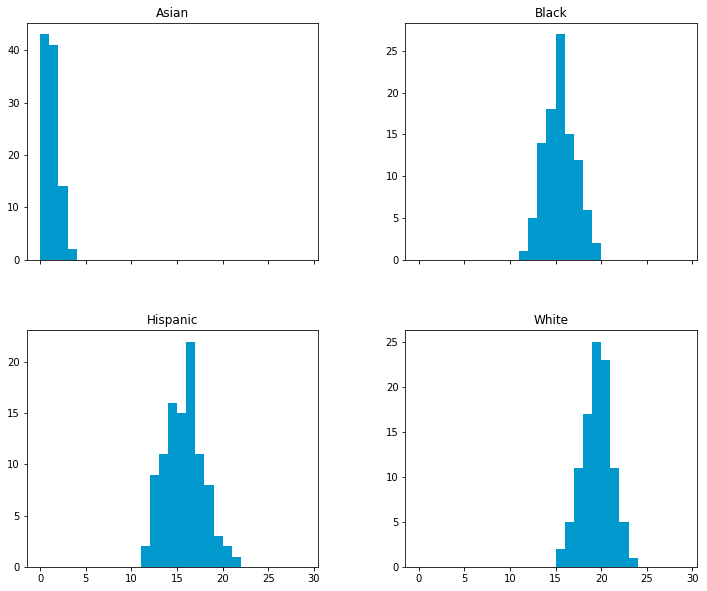

Asian        0.75
Black       15.00
Hispanic    15.23
White       19.02
dtype: float64
Plurality, case 1 change: probablities = (0.8, 0.2)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.75it/s]


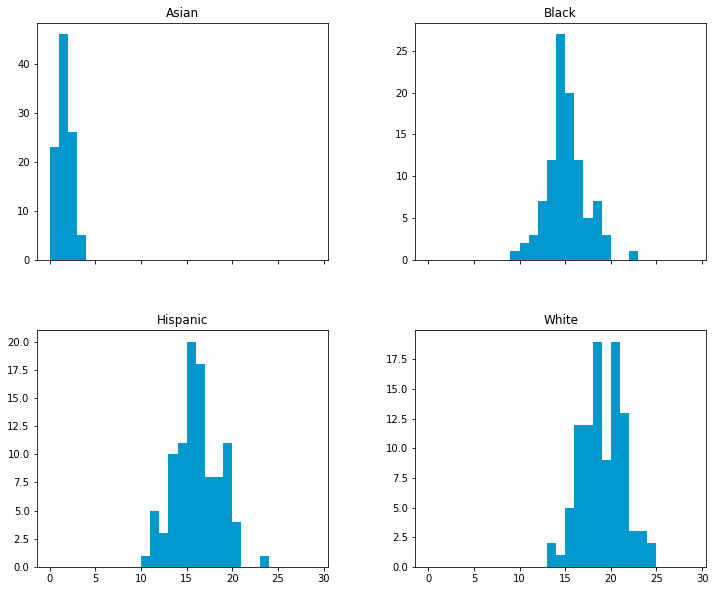

Asian        1.13
Black       14.62
Hispanic    15.65
White       18.60
dtype: float64
Plurality, case 2 change: probablities = (0.55, 0.45)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


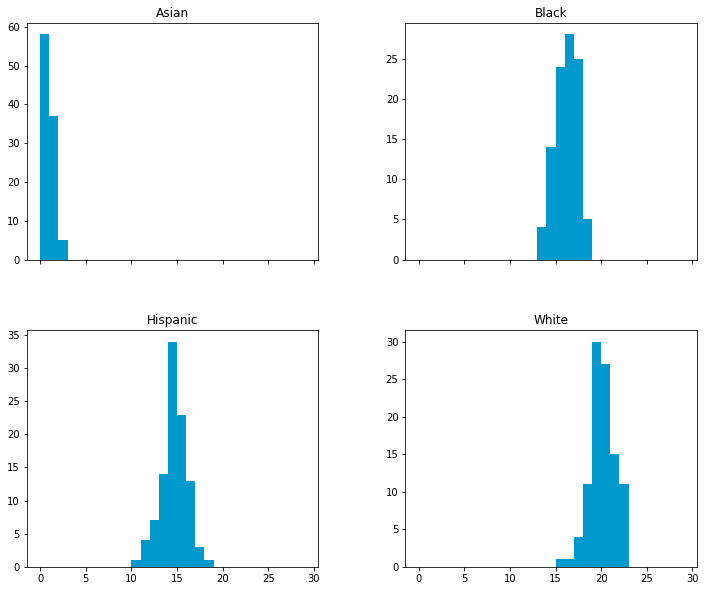

Asian        0.47
Black       15.71
Hispanic    14.18
White       19.64
dtype: float64
Plurality, case 2 change: probablities = (0.5, 0.5)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.93it/s]


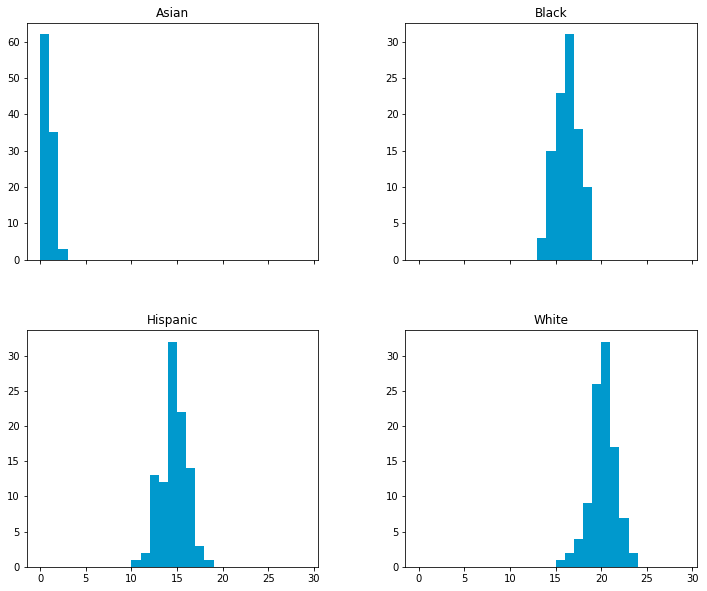

Asian        0.41
Black       15.76
Hispanic    14.15
White       19.68
dtype: float64
Plurality, case 2 change: probablities = (0.45, 0.55)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.84it/s]


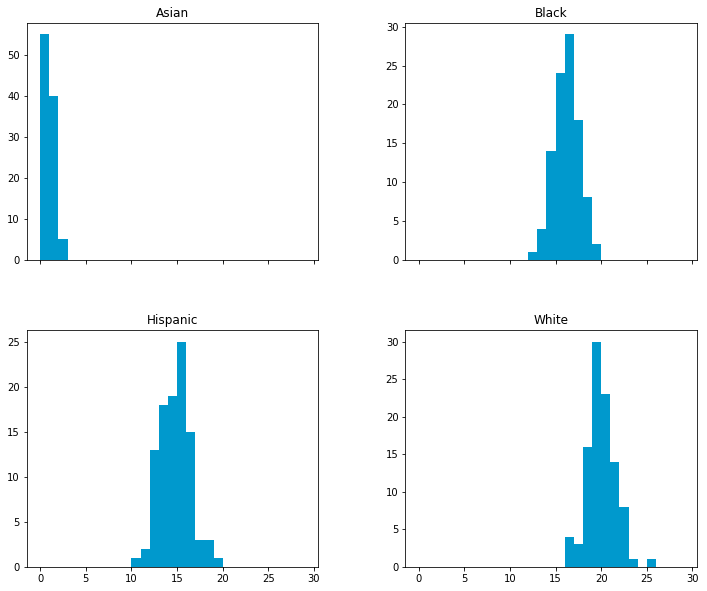

Asian        0.50
Black       15.72
Hispanic    14.27
White       19.51
dtype: float64
Plurality, case 2 change: probablities = (0.4, 0.6)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 11.87it/s]


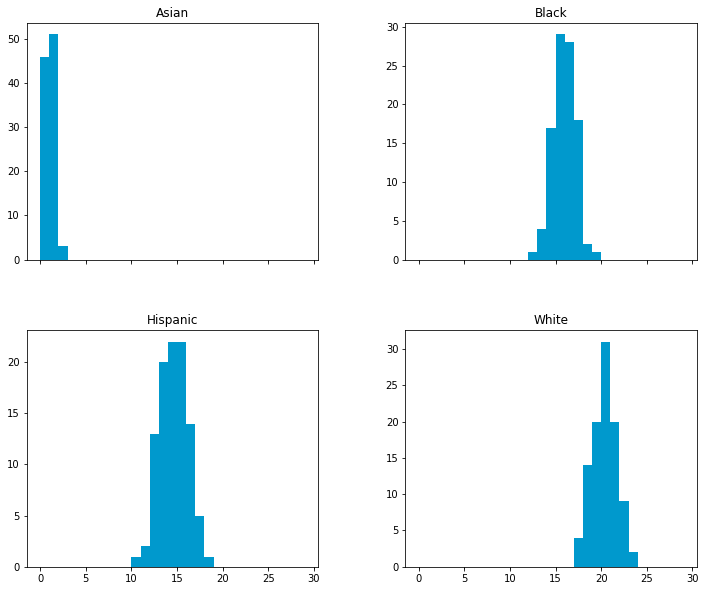

Asian        0.57
Black       15.46
Hispanic    14.13
White       19.84
dtype: float64
Plurality, case 2 change: probablities = (0.65, 0.35)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.36it/s]


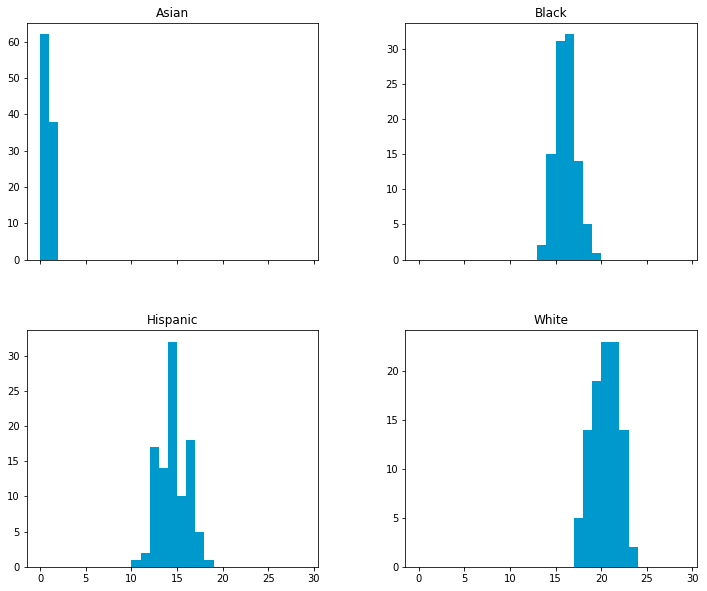

Asian        0.38
Black       15.60
Hispanic    14.07
White       19.95
dtype: float64
Plurality, case 2 change: probablities = (0.7, 0.3)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.12it/s]


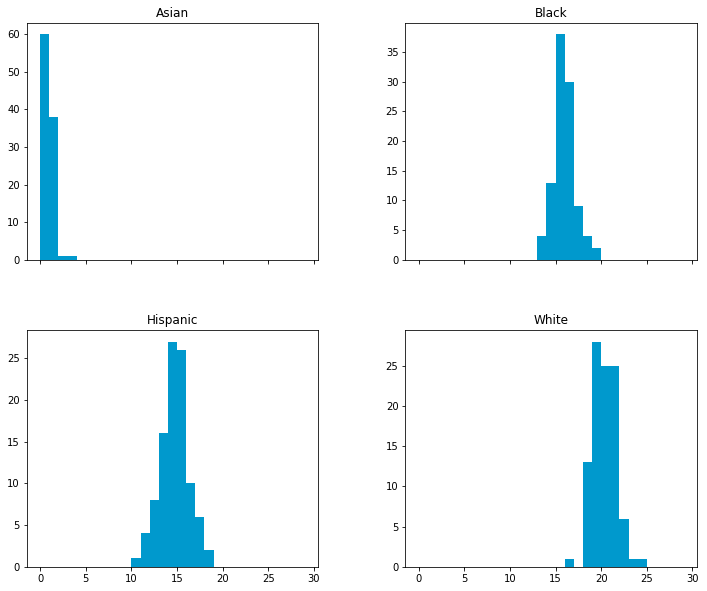

Asian        0.43
Black       15.47
Hispanic    14.24
White       19.86
dtype: float64
Plurality, case 3 change: probablities = (0.5, 0.3, 0.3)


  0%|                                                                                                                                 | 0/100 [00:00<?, ?it/s]


ValueError: ('probabilities do not sum to 1', 'occurred at index 2992207')

In [26]:
# FiftyByOne
print("FiftyByOne sensitivity analysis")
data = prec50
for sampler in fivexone:
    # Sample
    outcomes = pandas.DataFrame.from_records(random_sample(data, num_samples, sampler))
    outcomes.groupby(groups).size()
    # Plot the results
    outcomes[groups].hist(sharex=True, grid=False, figsize=(12,10), color="#0099cd", bins=list(range(30)))
    # Compute statistics for the projected outcomes
    plt.show()
    print(outcomes.mean())

In [ ]:
# TenByFive
print("TenByFive sensitivity analysis")
data = prec10
for sampler in tenxfive:
    # Sample
    outcomes = pandas.DataFrame.from_records(random_sample(data, num_samples, sampler))
    outcomes.groupby(groups).size()
    # Plot the results
    outcomes[groups].hist(sharex=True, grid=False, figsize=(12,10), color="#0099cd", bins=list(range(30)))
    # Compute statistics for the projected outcomes
    outcomes.mean()

In [ ]:
# TenByThree
print("TenByThree sensitivity analysis")
data = prec10
for sampler in tenxthree:
    # Sample
    outcomes = pandas.DataFrame.from_records(random_sample(data, num_samples, sampler))
    outcomes.groupby(groups).size()
    # Plot the results
    outcomes[groups].hist(sharex=True, grid=False, figsize=(12,10), color="#0099cd", bins=list(range(30)))
    # Compute statistics for the projected outcomes
    outcomes.mean()